# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


'e6b224e4b358cbcbca0782ff11081b44'

## Generate Cities List

In [6]:
# Set up a List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    print(city)
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

jamestown
ulladulla
batagay-alyta
puerto ayora
ancud
jamestown
belushya guba
rikitea
carnarvon
new norfolk
hobart
rikitea
kuva
ponta do sol
hilo
samarai
butaritari
tumannyy
punta arenas
puerto ayora
waihi beach
cabedelo
hobart
salalah
bacuit
hervey bay
ketchikan
avera
ribeira grande
guaruja
jamestown
tasiilaq
rikitea
yellowknife
mosquera
vila velha
hermanus
olafsvik
tura
kapaa
mataura
chokurdakh
punta arenas
mikhaylovka
east london
hasaki
sao filipe
mataura
port alfred
puerto ayora
chuy
paragominas
komsomolskiy
poroschia
huarmey
nanortalik
mwense
hilo
vaini
lompoc
arraial do cabo
kodiak
moose factory
mildura
portland
port alfred
avarua
hilo
puerto ayora
albany
albany
guerrero negro
atar
ancud
vaini
tuktoyaktuk
olafsvik
kaitangata
ushuaia
rikitea
chokurdakh
illoqqortoormiut
saint george
maumere
punta arenas
hobart
lubin
chiang khong
tiznit
hermanus
matay
kapaa
ribeira grande
kodiak
hobyo
khatanga
qaanaaq
barrow
ushuaia
cabo san lucas
praia
albany
torbay
jamestown
sitka
egvekinot
victor 

naze
acapulco
barentsburg
santa adelia
bluff
ushuaia
ribeira grande
hilo
ribeira grande
terney
albany
torbay
geraldton
mar del plata
illoqqortoormiut
marawi
rikitea
punta arenas
dali
alma
pisco
tinskoy
mehamn
barrow
petropavlovsk-kamchatskiy
sarakhs
rikitea
pacific grove
vaini
sitka
calabozo
acari
cayenne
beloha
rikitea
gizo
samusu
yellowknife
lebu
aksu
dikson
port alfred
mecca
qinhuangdao
bredasdorp
severo-kurilsk
rovenki
bredasdorp
lagoa
barentsburg
busselton
kapaa
lompoc
cap malheureux
provideniya
ushuaia
vaini
kapaa
macusani
massakory
cape town
porto nacional
kushima
arraial do cabo
port hardy
yar-sale
punta arenas
tiksi
dwarka
golden rock
raudeberg
busselton
lagoa
luanda
aflu
ribeira grande
hithadhoo
barrow
provideniya
cabo san lucas
constitucion
esperance
bredasdorp
rikitea
ushuaia
bluff
jamestown
port alfred
provideniya
terrace bay
hithadhoo
yellowknife
rikitea
chara
kashan
clinton
georgetown
rexburg
rikitea
tecoanapa
itarema
saint-philippe
kavieng
geraldton
rikitea
dikson
luder

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# define URL for weather
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build a partial query URL
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=e6b224e4b358cbcbca0782ff11081b44&units=imperial&q='

In [9]:
# Create empty list to hold the values  
cities_name = []
cloudinesses = []
countries = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []

# set up the counter
count_one =0
set_one = 0

In [10]:
# create a for loops to loop throught each variable

for city in cities:
    # create a seach query, make request and store in json    
#     query_url = query_url + city
    response = requests.get(query_url + city)
    response_json = response.json()

    # Try to grab the cities values if they are available in the Weather API
    try:
        countries.append(response_json['sys']['country'])
        cloudinesses.append(response_json['clouds']['all'])
        dates.append(response_json['dt'])
        humidities.append(response_json['main']['humidity'])
        lats.append(response_json['coord']['lat'])
        lngs.append(response_json['coord']['lon'])
        max_temps.append(response_json['main']['temp_max'])
        wind_speeds.append(response_json['wind']['speed'])   
        
        
        if count_one > 50:
            count_one = 1
            set_one += 1
            cities_name.append(city)
        else:
            count_one += 1
            cities_name.append(city)
               
        print(f"Processing Record {count_one} of {set_one} | {city}")

    # Handle exceptions for a value that is not available on Weather API

    except:
        # Append null values
        print("City not found. Skipping...")        
            

Processing Record 1 of 0 | jamestown
Processing Record 2 of 0 | ulladulla
Processing Record 3 of 0 | batagay-alyta
Processing Record 4 of 0 | puerto ayora
Processing Record 5 of 0 | ancud
City not found. Skipping...
Processing Record 6 of 0 | rikitea
Processing Record 7 of 0 | carnarvon
Processing Record 8 of 0 | new norfolk
Processing Record 9 of 0 | hobart
City not found. Skipping...
Processing Record 10 of 0 | ponta do sol
Processing Record 11 of 0 | hilo
Processing Record 12 of 0 | samarai
Processing Record 13 of 0 | butaritari
City not found. Skipping...
Processing Record 14 of 0 | punta arenas
Processing Record 15 of 0 | waihi beach
Processing Record 16 of 0 | cabedelo
Processing Record 17 of 0 | salalah
City not found. Skipping...
Processing Record 18 of 0 | hervey bay
Processing Record 19 of 0 | ketchikan
Processing Record 20 of 0 | avera
Processing Record 21 of 0 | ribeira grande
Processing Record 22 of 0 | guaruja
Processing Record 23 of 0 | tasiilaq
Processing Record 24 of 0

City not found. Skipping...
Processing Record 2 of 4 | jeremoabo
Processing Record 3 of 4 | machiques
Processing Record 4 of 4 | amapa
Processing Record 5 of 4 | boden
Processing Record 6 of 4 | faanui
Processing Record 7 of 4 | ampanihy
Processing Record 8 of 4 | lata
Processing Record 9 of 4 | saskylakh
Processing Record 10 of 4 | nicoya
Processing Record 11 of 4 | kavaratti
Processing Record 12 of 4 | the valley
Processing Record 13 of 4 | katsuura
Processing Record 14 of 4 | draguseni
Processing Record 15 of 4 | mistelbach
Processing Record 16 of 4 | edd
Processing Record 17 of 4 | praia da vitoria
Processing Record 18 of 4 | bonnyville
Processing Record 19 of 4 | ewa beach
Processing Record 20 of 4 | peniche
Processing Record 21 of 4 | shagonar
Processing Record 22 of 4 | inyonga
Processing Record 23 of 4 | hamilton
Processing Record 24 of 4 | port hedland
Processing Record 25 of 4 | bathsheba
Processing Record 26 of 4 | lasa
Processing Record 27 of 4 | severo-kurilsk
Processing R

Processing Record 5 of 8 | fort nelson
Processing Record 6 of 8 | tucurui
Processing Record 7 of 8 | wagga wagga
Processing Record 8 of 8 | vestmannaeyjar
Processing Record 9 of 8 | plettenberg bay
Processing Record 10 of 8 | caxias
Processing Record 11 of 8 | baracoa
Processing Record 12 of 8 | sao joao da barra
Processing Record 13 of 8 | charters towers
Processing Record 14 of 8 | shahgarh
Processing Record 15 of 8 | iqaluit
Processing Record 16 of 8 | corinto
Processing Record 17 of 8 | waddan
Processing Record 18 of 8 | campbell river
Processing Record 19 of 8 | corpus christi
Processing Record 20 of 8 | kanigiri
Processing Record 21 of 8 | zelenoborskiy
City not found. Skipping...
Processing Record 22 of 8 | hofn
Processing Record 23 of 8 | dhidhdhoo
Processing Record 24 of 8 | minab
Processing Record 25 of 8 | svetlogorsk
Processing Record 26 of 8 | boffa
Processing Record 27 of 8 | tamandare
Processing Record 28 of 8 | kozan
Processing Record 29 of 8 | sukumo
City not found. Sk

In [14]:
print('---------------------')
print('Data Retrieval Complete')

---------------------
Data Retrieval Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
# create a dictionary 
weather_dict = {
    "City":cities_name,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}
weather_dict

{'City': ['jamestown',
  'ulladulla',
  'batagay-alyta',
  'puerto ayora',
  'ancud',
  'rikitea',
  'carnarvon',
  'new norfolk',
  'hobart',
  'ponta do sol',
  'hilo',
  'samarai',
  'butaritari',
  'punta arenas',
  'waihi beach',
  'cabedelo',
  'salalah',
  'hervey bay',
  'ketchikan',
  'avera',
  'ribeira grande',
  'guaruja',
  'tasiilaq',
  'yellowknife',
  'mosquera',
  'vila velha',
  'hermanus',
  'olafsvik',
  'tura',
  'kapaa',
  'mataura',
  'chokurdakh',
  'mikhaylovka',
  'east london',
  'hasaki',
  'sao filipe',
  'port alfred',
  'chuy',
  'paragominas',
  'komsomolskiy',
  'poroschia',
  'huarmey',
  'nanortalik',
  'mwense',
  'vaini',
  'lompoc',
  'arraial do cabo',
  'kodiak',
  'moose factory',
  'mildura',
  'portland',
  'avarua',
  'albany',
  'guerrero negro',
  'atar',
  'tuktoyaktuk',
  'kaitangata',
  'ushuaia',
  'saint george',
  'maumere',
  'lubin',
  'chiang khong',
  'tiznit',
  'matay',
  'hobyo',
  'khatanga',
  'qaanaaq',
  'barrow',
  'cabo s

In [60]:
# Create a Data Frame to storage the results
weather_data_frame = pd.DataFrame(weather_dict)

# Exports results to csv file
weather_data_frame.to_csv(output_data_file)

# Count output results
weather_data_frame.count()
weather_data_frame.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,jamestown,90,US,1579998908,97,42.10,-79.24,36.00,5.82
1,ulladulla,29,AU,1579998970,49,-35.35,150.47,89.60,8.05
2,batagay-alyta,0,RU,1579998962,54,67.80,130.41,-34.38,4.38
3,puerto ayora,75,EC,1579999060,78,-0.74,-90.35,78.80,8.05
4,ancud,100,CL,1579998934,68,-41.87,-73.82,66.20,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

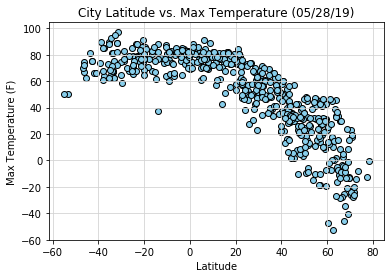

In [22]:
# Build Scatter Plot of  City Latitude vs. Max Temp (F) 
plt.scatter(weather_data_frame["Lat"],weather_data_frame["Max Temp"],edgecolors="black",facecolors="skyblue")

# Add properties to the graph
plt.title("City Latitude vs. Max Temperature (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#save the picture to a folder 
plt.savefig("output_data/CityLatitudeVsTemperature.png")
plt.show()

#### Latitude vs. Humidity Plot

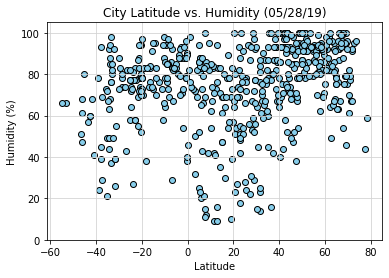

In [23]:
# Build Scatter Plot of  City Latitude vs. Humidity
plt.scatter(weather_data_frame["Lat"],weather_data_frame["Humidity"],edgecolors="black",facecolors="skyblue")

# Add properties to the graph
plt.title("City Latitude vs. Humidity (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#save the picture to a folder 
plt.savefig("output_data/CityLatitudeVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

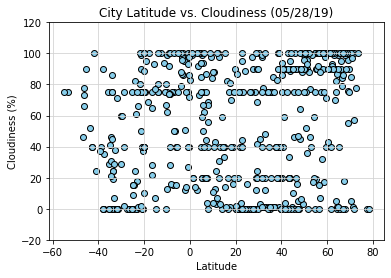

In [24]:
# Build Scatter Plot of  City Latitude vs. Cloudiness
plt.scatter(weather_data_frame["Lat"],weather_data_frame["Cloudiness"],edgecolors="black",facecolors="skyblue")

# Add properties to the graph
plt.title("City Latitude vs. Cloudiness (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-20,120)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#save the picture to a folder 
plt.savefig("output_data/CityLatitudeVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

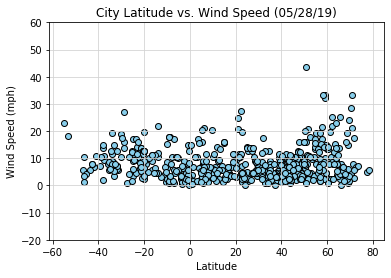

In [25]:
# Build Scatter Plot of  City Latitude vs. Wind Speed
plt.scatter(weather_data_frame["Lat"],weather_data_frame["Wind Speed"],edgecolors="black",facecolors="skyblue")

# Add properties to the graph
plt.title("City Latitude vs. Wind Speed (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-20,60)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


plt.savefig("output_data/CityLatitudeVsWindSpeed.png")
plt.show()

## Linear Regression

In [19]:
# Range of latitudes for Northern Hemisphere
lat_range = (0, 90)

In [26]:
# Run linear regression on each relationship, only this time separating them into Northern and Southern Hemisphere 
# Define axis x and y
x_values = weather_data_frame['Lat']
y_values = weather_data_frame['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0       34.917975
1       93.044329
2       15.630082
3       67.069466
4       97.937599
          ...    
556     67.054456
557    101.134737
558     81.666723
559     35.210671
560     22.827393
Name: Lat, Length: 561, dtype: float64


In [27]:
# Define axis x and y
x_values = weather_data_frame['Lat']
y1_values = weather_data_frame['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y1_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      58.982097
1      42.300820
2      64.517395
3      49.755164
4      40.896534
         ...    
556    49.759472
557    39.979010
558    45.565999
559    58.898098
560    62.451889
Name: Lat, Length: 561, dtype: float64


In [28]:
# Define axis x and y
x_values = weather_data_frame['Lat']
y2_values = weather_data_frame['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y2_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      78.298107
1      65.731872
2      82.467923
3      71.347332
4      64.674004
         ...    
556    71.350577
557    63.982820
558    68.191576
559    78.234830
560    80.911949
Name: Lat, Length: 561, dtype: float64


In [29]:
# Define axis x and y
x_values = weather_data_frame['Lat']
y3_values = weather_data_frame['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y3_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      8.130160
1      7.876597
2      8.214298
3      7.989906
4      7.855252
         ...   
556    7.989972
557    7.841305
558    7.926229
559    8.128883
560    8.182902
Name: Lat, Length: 561, dtype: float64


In [24]:
# Create Northern and Southern Hemisphere DataFrames

In [30]:
# Northern Hemisphere - Temperature (F) vs. Latitude
northern_hemisphere_df = weather_data_frame.loc[weather_data_frame['Lat']>0,:]
northern_hemisphere_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,jamestown,90,US,1579998908,97,42.10,-79.24,36.00,5.82
2,batagay-alyta,0,RU,1579998962,54,67.80,130.41,-34.38,4.38
9,ponta do sol,20,PT,1579999061,67,32.67,-17.10,60.80,5.82
10,hilo,90,US,1579998933,57,19.73,-155.09,80.60,6.93
12,butaritari,12,KI,1579998927,72,3.07,172.79,85.03,10.56


In [31]:
# Southern Hemisphere - Temperature (F) vs. Latitude
southern_hemisphere_df = weather_data_frame.loc[weather_data_frame['Lat']<0,:]
southern_hemisphere_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,ulladulla,29,AU,1579998970,49,-35.35,150.47,89.60,8.05
3,puerto ayora,75,EC,1579999060,78,-0.74,-90.35,78.80,8.05
4,ancud,100,CL,1579998934,68,-41.87,-73.82,66.20,6.93
5,rikitea,18,PF,1579998882,77,-23.12,-134.97,79.25,14.03
6,carnarvon,15,AU,1579998931,74,-24.87,113.63,78.80,17.22


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [32]:
# OPTIONAL: Create a function to create Linear Regression plots
def regresion_plot(df,title_name,y_name,y_label,file_name,xy):    
    x_values = df['Lat']
    y_values = df[y_name]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_equation = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    
    plt.plot(x_values, regress_values, "r-")
    plt.title(title_name)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
    plt.annotate(line_equation, xy, fontsize=12, color="purple")

    print(f"The r-squared is: {rvalue}")
    
    plt.savefig(file_name)

The r-squared is: -0.8561817643548616


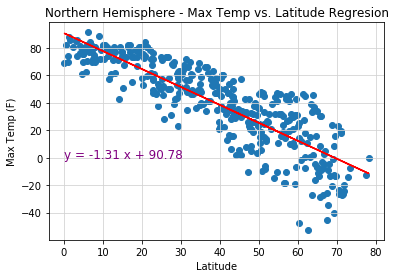

In [37]:
# Create the plot for Max Temp vs. Latitude linear regresion
# Apply the regresion
regresion_plot(northern_hemisphere_df,\
               'Northern Hemisphere - Max Temp vs. Latitude Regresion',
               'Max Temp', 'Max Temp (F)', 'output_data/Northern_LatitudeRegresion_vs_MaxTemp.png',(0,0))


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.2587106114152503


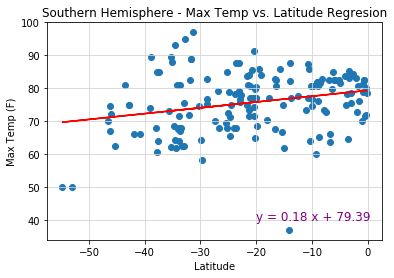

In [46]:
# Southern Hemisphere - Temperature (F) vs. Latitude
# # Apply the regresion
regresion_plot(southern_hemisphere_df,\
               'Southern Hemisphere - Max Temp vs. Latitude Regresion',
               'Max Temp', 'Max Temp (F)', 'output_data/Southern_LatitudeRegresion_vs_MaxTemp.png',(-20,40))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3909767019362812


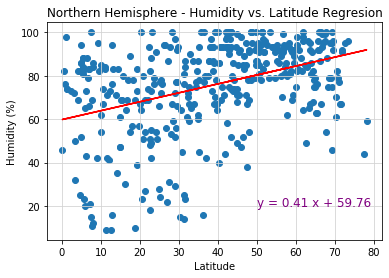

In [36]:
# * Northern Hemisphere - Humidity (%) vs. Latitude
# Apply the regresion
regresion_plot(northern_hemisphere_df,\
               'Northern Hemisphere - Humidity vs. Latitude Regresion',
               'Humidity', 'Humidity (%)', 'output_data/Northern_LatitudeRegresion_vs_Humidity.png',(50,20))

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.37287279008218643


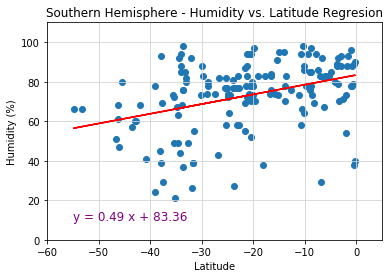

In [53]:
# * Southern Hemisphere - Humidity (%) vs. Latitude
# Define limit to center the plot 
plt.xlim([-60, 5])
plt.ylim([0, 110])

# Apply the regresion
regresion_plot(southern_hemisphere_df,\
               'Southern Hemisphere - Humidity vs. Latitude Regresion',
               'Humidity', 'Humidity (%)', 'output_data/Southern_LatitudeRegresion_vs_Humidity.png',(-55,10))



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2285912959243647


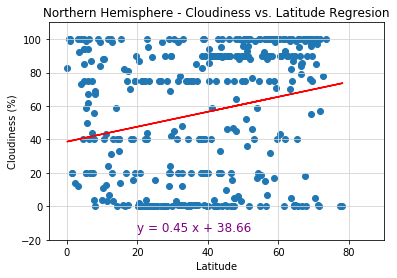

In [54]:
#  Northern Hemisphere - Cloudiness (%) vs. Latitude
# Define limit to center the plot 
plt.xlim([-5, 90])
plt.ylim([-20, 110])

# Apply the regresion
regresion_plot(northern_hemisphere_df,\
               'Northern Hemisphere - Cloudiness vs. Latitude Regresion',
               'Cloudiness', 'Cloudiness (%)', 'output_data/Northern_LatitudeRegresion_vs_Cloudiness.png',(20,-15))


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.30914679879568924


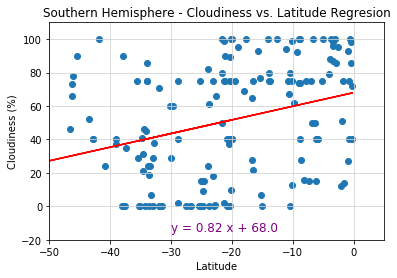

In [57]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude
# Define limits to center the plot
plt.xlim([-50, 5])
plt.ylim([-20, 110])

# Apply the regresion
regresion_plot(southern_hemisphere_df,\
               'Southern Hemisphere - Cloudiness vs. Latitude Regresion',
               'Cloudiness', 'Cloudiness (%)', 'output_data/Southern_LatitudeRegresion_vs_Cloudiness.png',(-30,-15))


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.16735985690946031


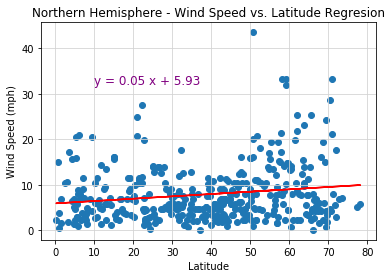

In [58]:
# * Northern Hemisphere - Wind Speed (mph) vs. Latitude
# # Apply the regresion
regresion_plot(northern_hemisphere_df,\
               'Northern Hemisphere - Wind Speed vs. Latitude Regresion',
               'Wind Speed', 'Wind Speed (mph)', 'output_data/Northern_LatitudeRegresion_vs_WindSpeed.png',(10,32))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.26003079698191506


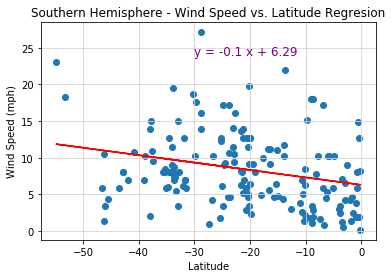

In [59]:
# * Southern Hemisphere - Wind Speed (mph) vs. Latitude
# Apply the regresion
regresion_plot(southern_hemisphere_df,\
               'Southern Hemisphere - Wind Speed vs. Latitude Regresion',
               'Wind Speed', 'Wind Speed (mph)', 'output_data/Southern_LatitudeRegresion_vs_WindSpeed.png',(-30,24))